In [5]:
import PIL
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
# import cv2

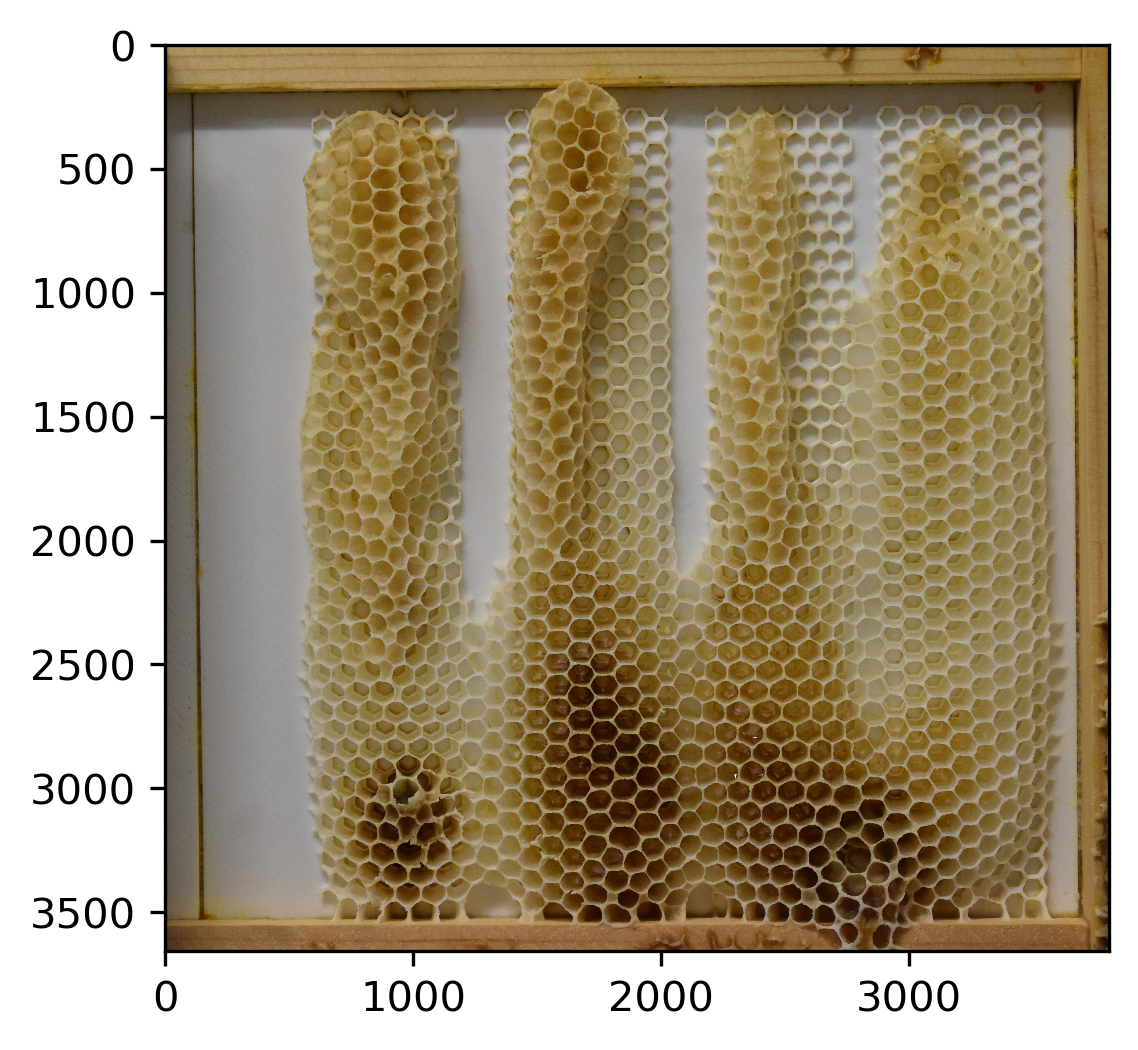

In [8]:
mpl.rcParams['figure.dpi'] = 300

# Image info - This section should be edited for each image

file_name = '2A'
crop_code = 5
plot_folder = '/Users/Zhang/Beecomb_Analysis/{}'.format(file_name)

im = Image.open('{}/{}_after.JPG'.format(plot_folder, file_name))
plt.imshow(im)

In [7]:
import urllib
import cv2
from win32api import GetSystemMetrics

#the [x, y] for each right-click event will be stored here
coordinates = []

def mouse_callback(event, x, y, flags, params):

    #right-click event value is 2
    if event == 2:
        global right_clicks

        #store the coordinates of the right-click event
        coordinates.append([x, y])

        print(coordinates)

        
# To get coordinates, right click the points you want in the following order:
# bottom left corner of crop, top right corner of crop, enter
img = cv2.imread('{}/{}_after.JPG'.format(plot_folder, file_name))
scale_width = 640 / img.shape[1]
scale_height = 480 / img.shape[0]
scale = min(scale_width, scale_height)
window_width = int(img.shape[1] * scale)
window_height = int(img.shape[0] * scale)
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.resizeWindow('image', window_width, window_height)

#set mouse callback function for window
cv2.setMouseCallback('image', mouse_callback)

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[923, 2869]]
[[923, 2869], [3174, 2282]]


923 2869 3174 2282


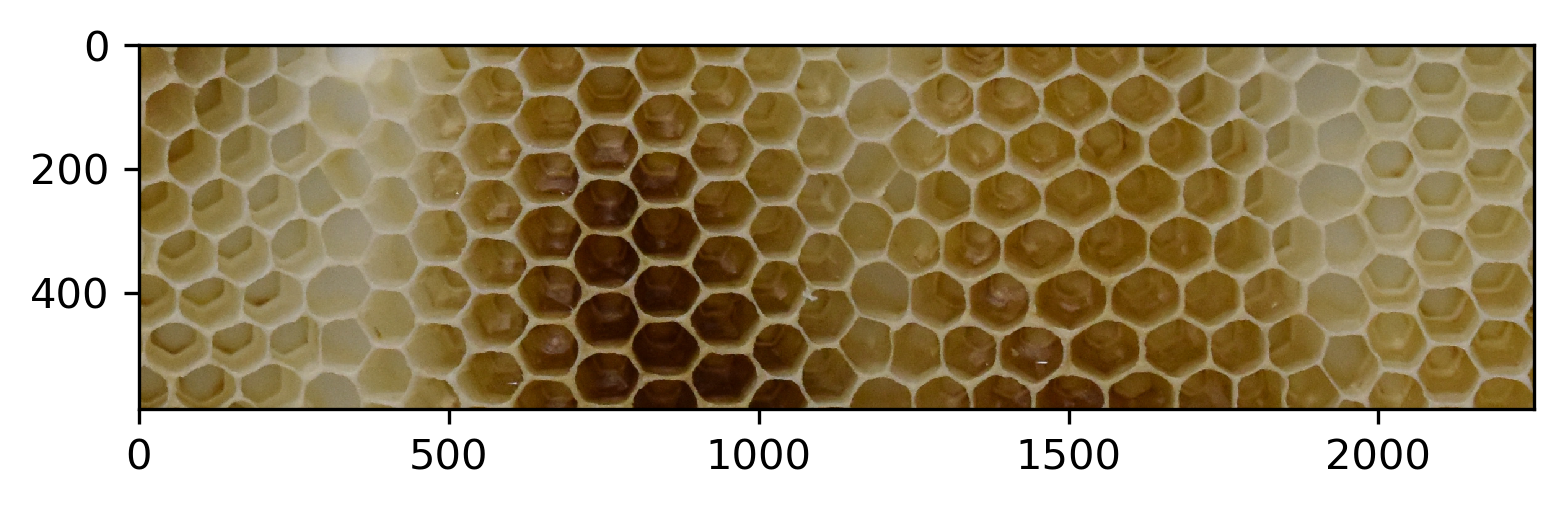

In [10]:
left = coordinates[0][0]
bottom = coordinates[0][1]
right = coordinates[1][0]
top = coordinates[1][1]
print(left, bottom, right, top)

im_crop = im.crop((left, top, right, bottom))

plt.imshow(im_crop)


im_crop.save('{}/{}_crop{}.jpg'.format(plot_folder, file_name, crop_code))

In [12]:
coordinates = ("Left:", left, "| Bottom:", bottom, "| Right:", right, "| Top: ", top)
with open('{}/{}_crop{}_coordinates.txt'.format(plot_folder, file_name, crop_code), 'w') as writer:
    writer.write(str(coordinates))

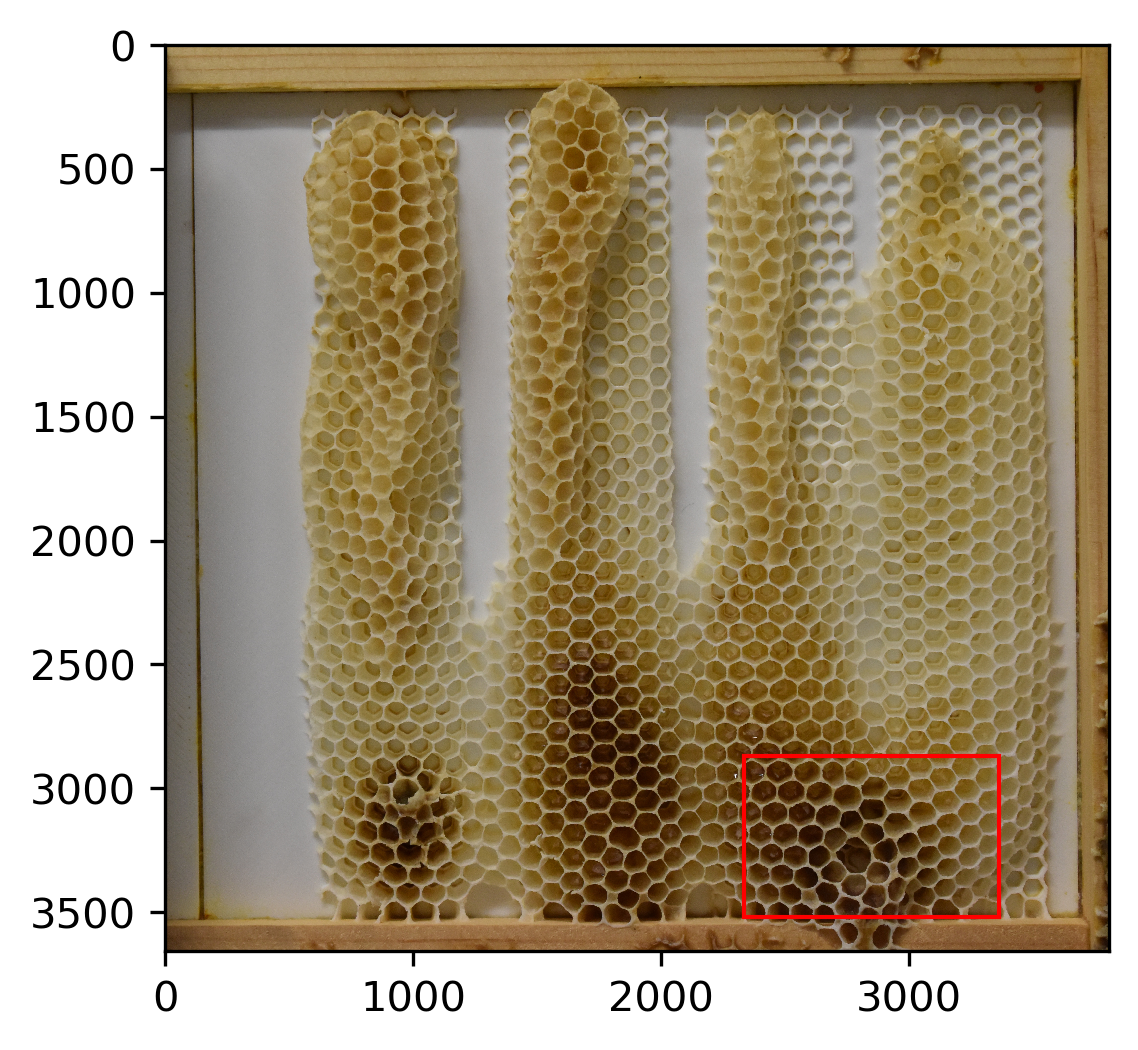

In [98]:
from PIL import ImageDraw
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((left, bottom),(right - left), (top - bottom),linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()
# plt.imsave('{}/{}_crop{}_big_picture.JPG'.format(plot_folder, file_name, crop_code), im)